# Predictive Analytics of Football Players' Performance
The sports entertainment sector and the relevant stakeholders extensively use sophisticated algorithms to improve earnings and reduce business risk associated with selecting or betting on the wrong players. This Multiple linear Regression Model provides a generalised ML case, which could assess the players performance through their scoring ability.

## Architecture Diagram

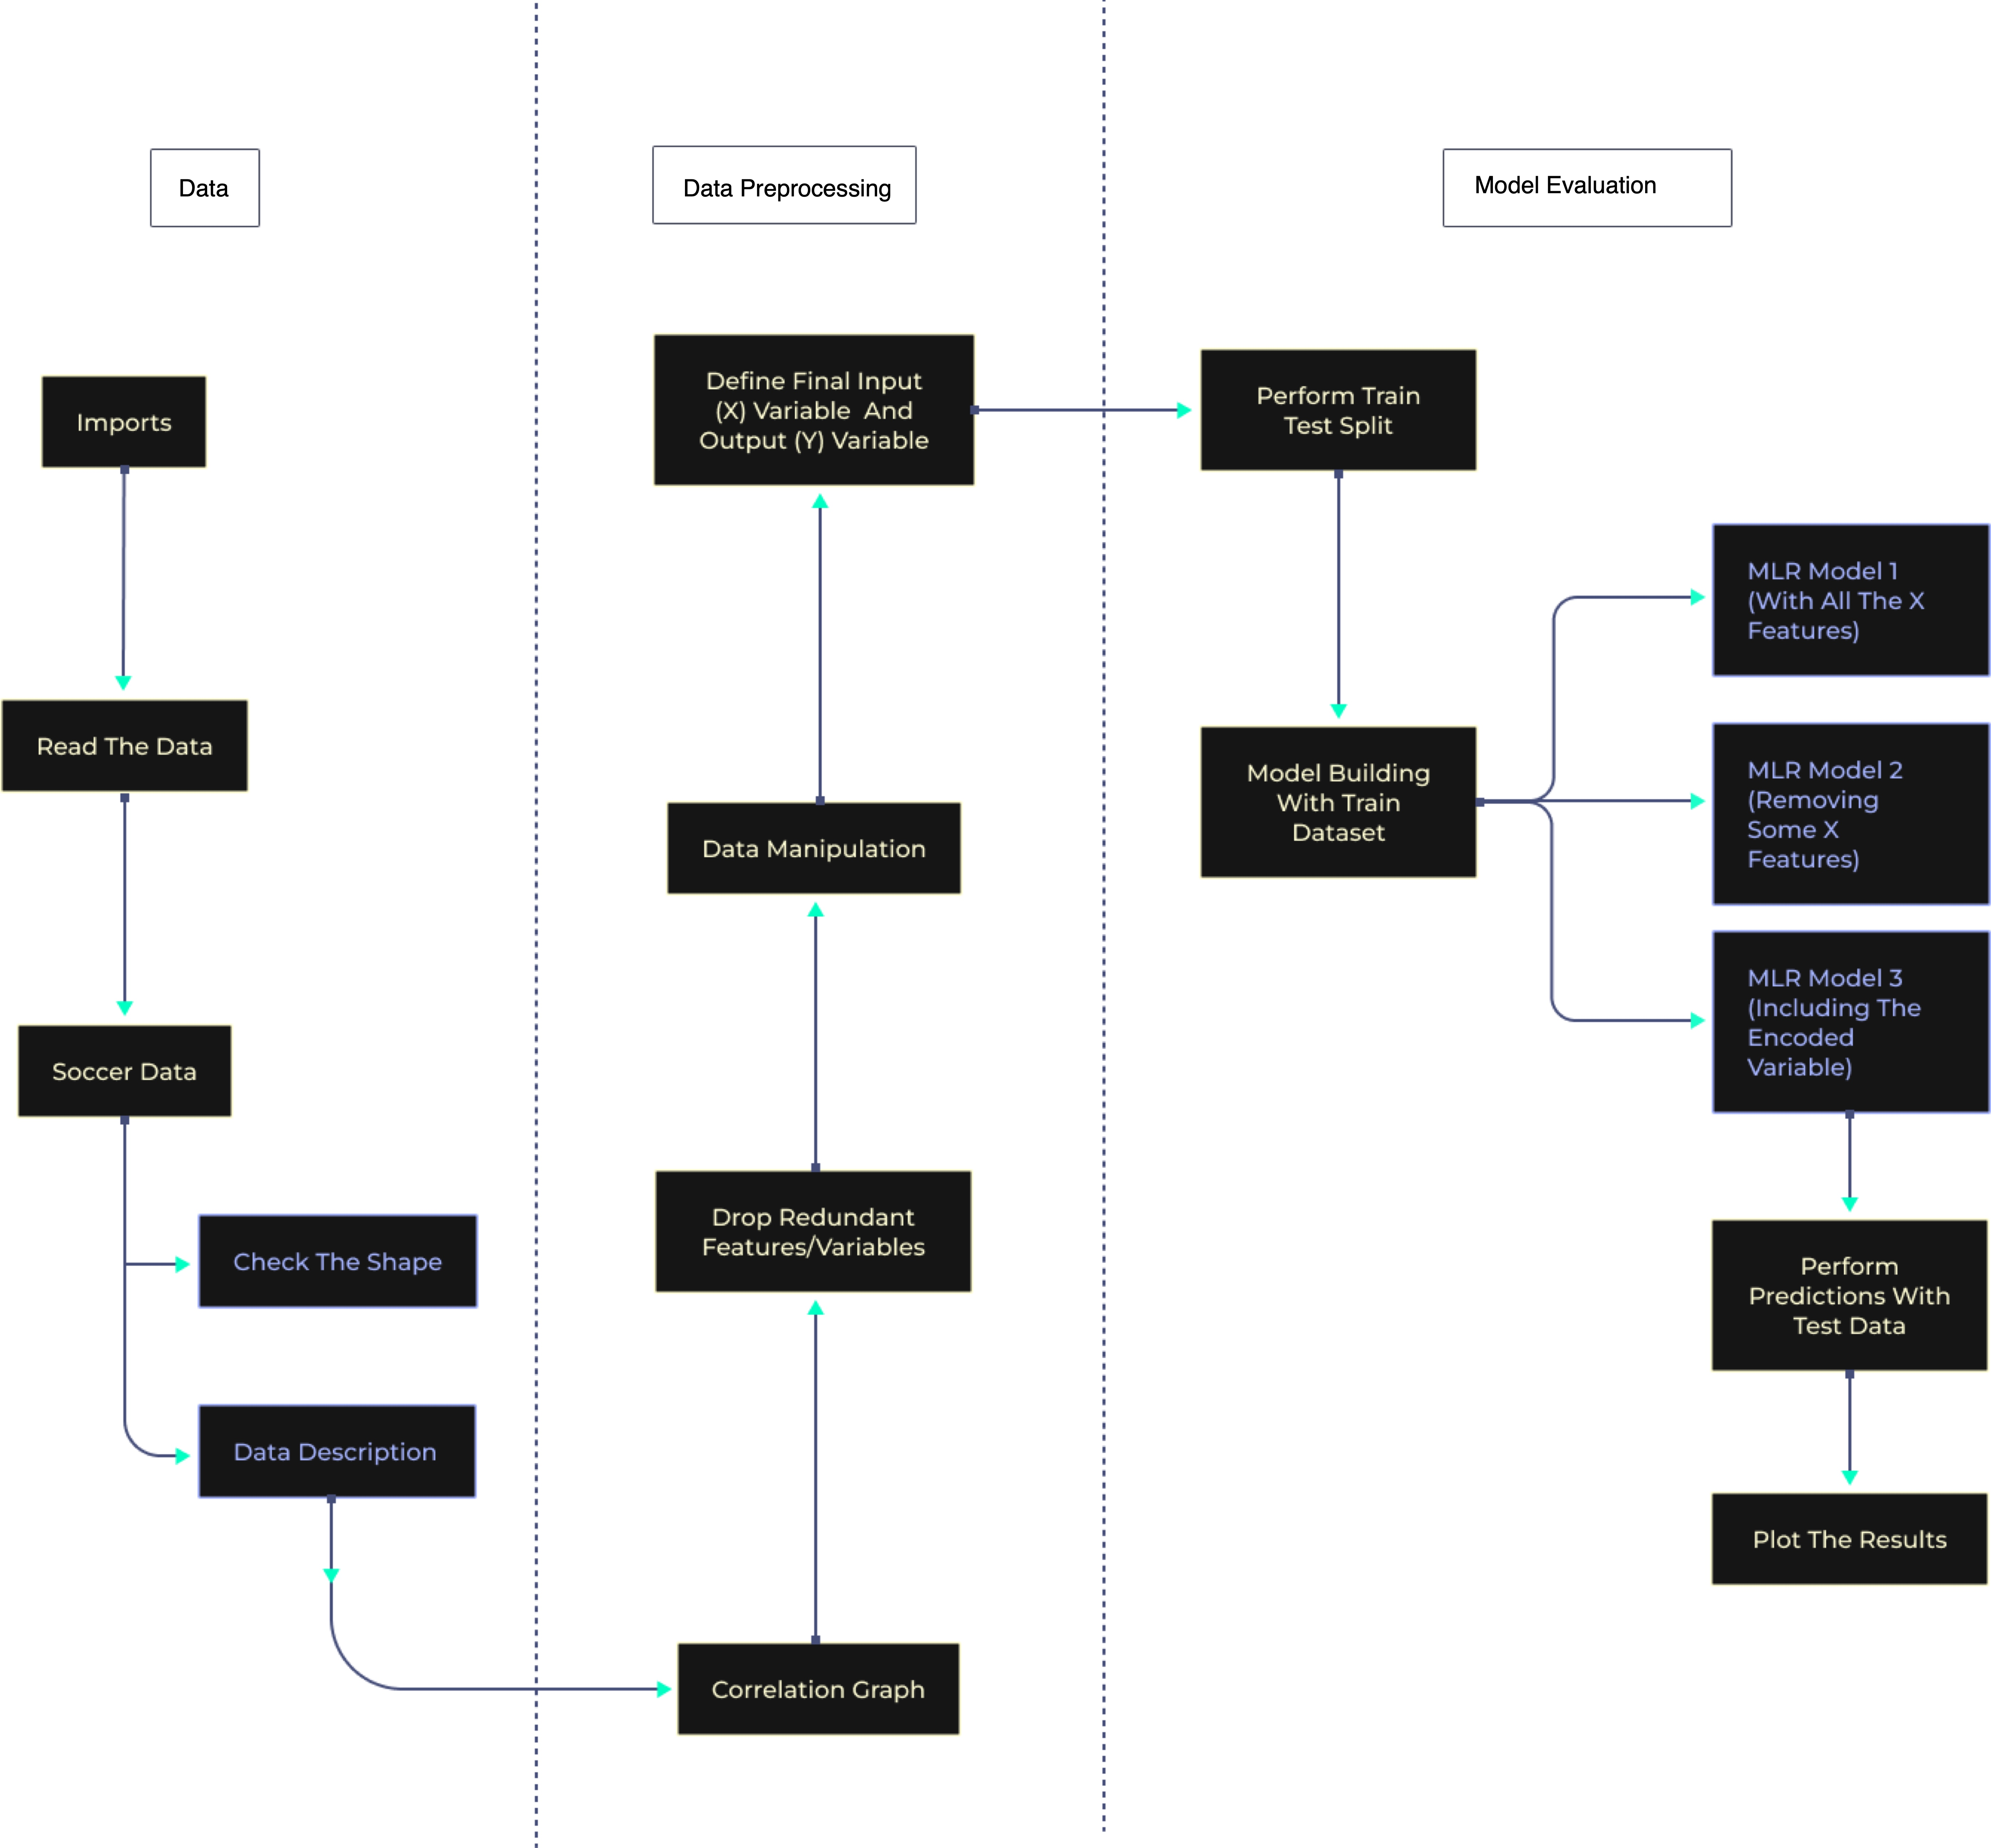

In [3]:
from IPython.display import Image
Image(filename='cover.jpg')

## Install Packages

In [4]:
import warnings
warnings.filterwarnings('ignore')


from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure

## Importing Dataset

In [5]:
df = pd.read_csv("EPL_Soccer_MLR_LR.csv")

In [6]:
df.head(3)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88


In [7]:
df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

## Data Dictionary
PlayerName : Player Name

Club : Club of the player

MUN:Manchester United F.C.
CHE: Chelsea F.C.
LIV: Liverpool F.C.
DistanceCovered(InKms): Average Kms distance covered by the player in each game

Goals: Average Goals per match

MinutestoGoalRatio: Minutes

ShotsPerGame: Average shots taken per game

AgentCharges: Agent Fees in h

BMI: Body-Mass index

Cost: Cost of each player in hundread thousand dollars

PreviousClubCost: Previous club cost in hundread thousand dollars

Height: Height of player in cm

Weight: Weight of player in kg

Score: Average score per match

## Exploratory Data Analysis (EDA)

In [8]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [9]:
# check the shape of the data
df.shape

(202, 13)

In [10]:
df.dtypes

PlayerName                 object
Club                       object
DistanceCovered(InKms)    float64
Goals                     float64
MinutestoGoalRatio        float64
ShotsPerGame              float64
AgentCharges                int64
BMI                       float64
Cost                      float64
PreviousClubCost          float64
Height                    float64
Weight                    float64
Score                     float64
dtype: object

In [11]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr(method = "pearson")

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


## Correlation Plot

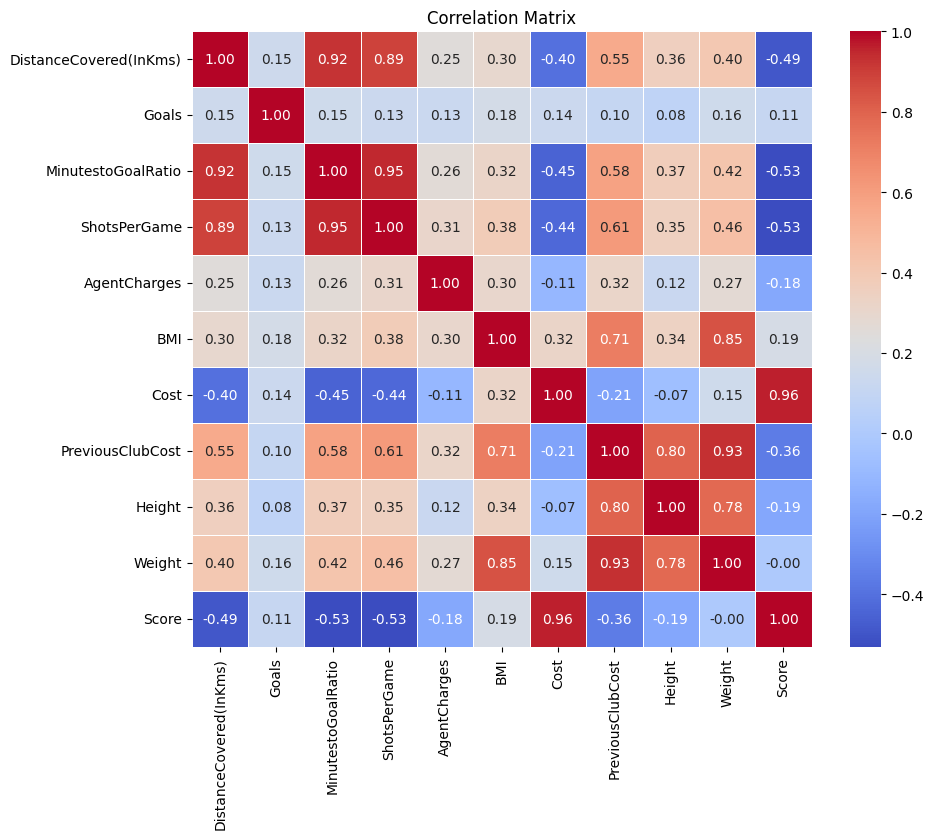

In [12]:
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Let's analyze the correlation scores of variables concerning "Score."
 
* We should remove some weakly correlated variables such as Height and Weight with -0.190 and 0.00016 correlation.
 
__* Notice some variables are correlated with each other as well, such as MinutestoGoalRatio and ShotsPerGame. We will take only one of them, ShotsPerGame. What will happen if we include multiple such variables in our model? This is called multicollinearity!__


## Scatter Plot Matrix

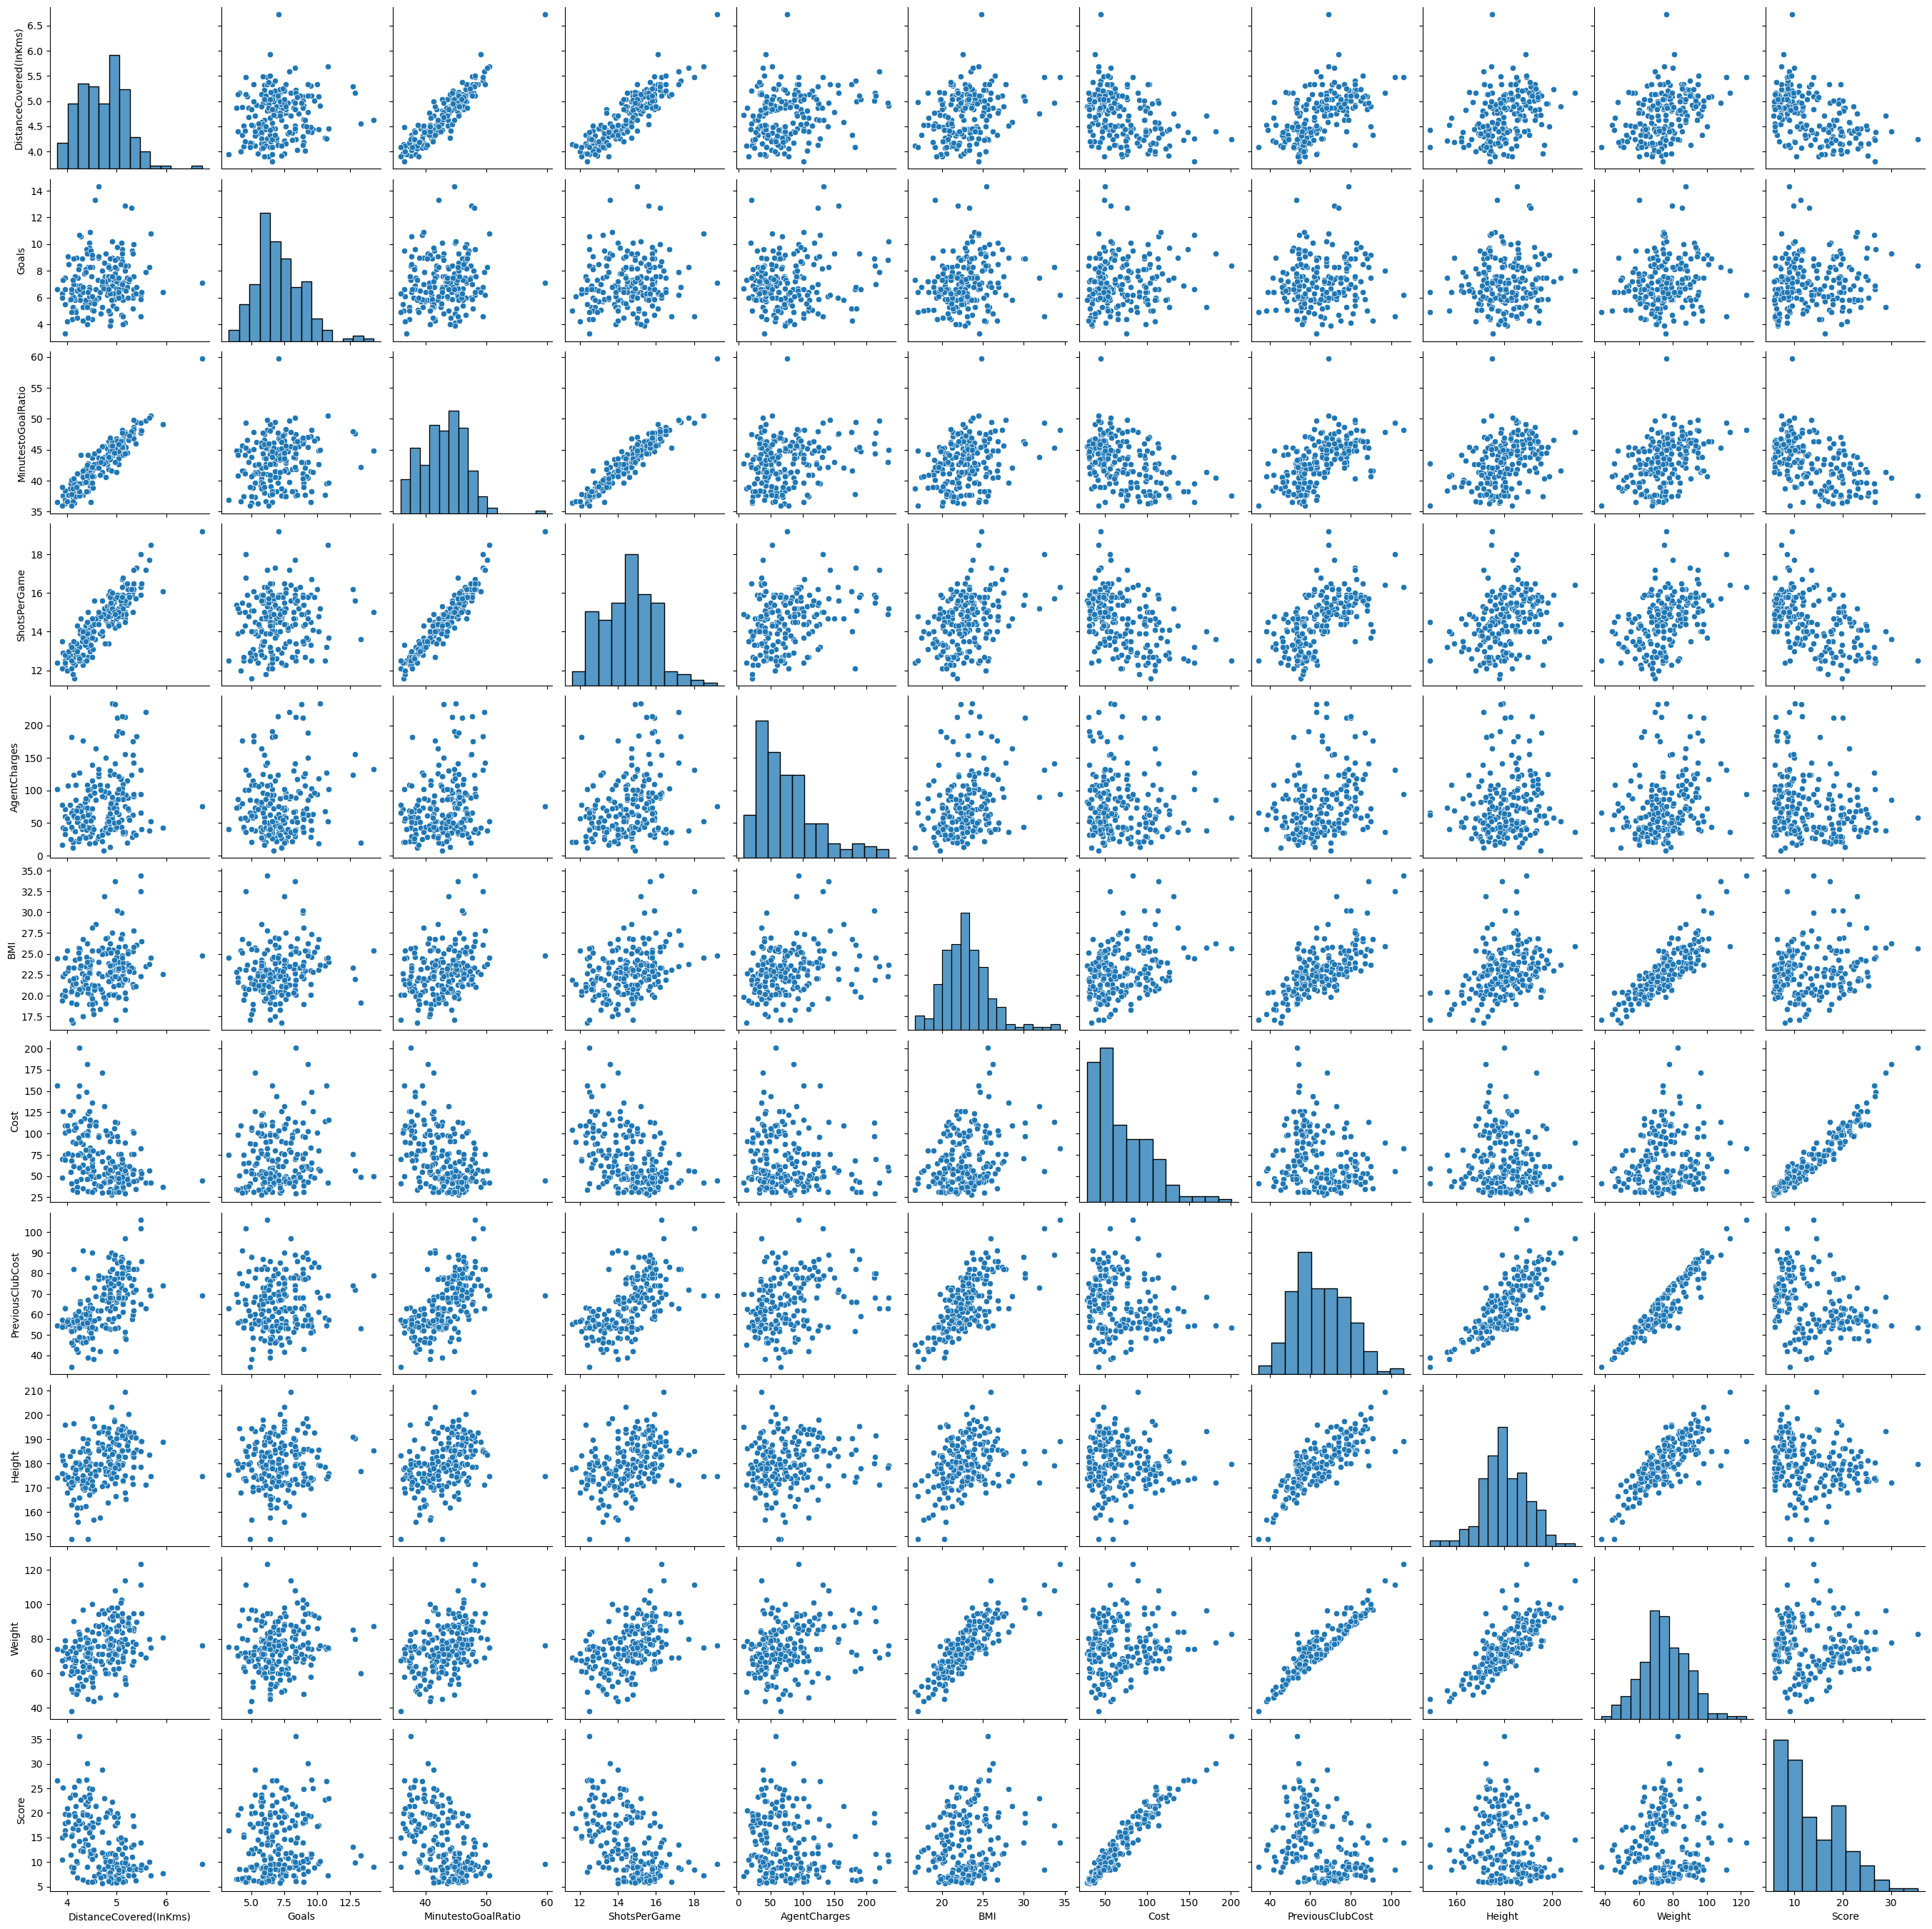

In [13]:
sns.pairplot(numeric_df)
plt.show()

In [14]:
# Extract predictor variables (remove categorical variables like team)
X = df[['DistanceCovered(InKms)', 'Goals',
       'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost']]
y = df['Score']

## Test Train Split

In [15]:
#Splitting with 75% training, 25% testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)

# Model Fitting

## 1. ML Model with all Numerical Variables

In [16]:
# Fit the linear regression model
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     476.6
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           9.69e-96
Time:                        13:04:09   Log-Likelihood:                -252.91
No. Observations:                 151   AIC:                             521.8
Df Residuals:                     143   BIC:                             546.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

We got an $R^2$ of 0.959 which is pretty great and the difference between $R^2$  and Adjusted $R^2$ is not very significant which is also a great sign. Let's try to eliminate some variables and see if we can improve our results.

## 2. ML Model with Feature Selection

In [17]:
#Can we trim some variables and see how it performs?

X=df[['DistanceCovered(InKms)'
        , 'BMI', 'Cost',
       'PreviousClubCost']]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     843.0
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          9.28e-100
Time:                        13:04:09   Log-Likelihood:                -253.64
No. Observations:                 151   AIC:                             517.3
Df Residuals:                     146   BIC:                             532.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9

The AIC and BIC both dropped even though we couldn't see much change in $R^2$. This suggest this model is better than the previous one. Let's see if "Club" information can throw anything else for us.

## 3. ML Model with Categorical + Numerical Features
### Dummy Variables

In [18]:
clubs=set(df.Club)
clubs

nominal_features = pd.get_dummies(df['Club'])
nominal_features = nominal_features.astype(int)
nominal_features.head()

,CHE,LIV,MUN
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [19]:
# concat dummy variables
df_encoded=pd.concat([df,nominal_features], axis=1)
df_encoded.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score,CHE,LIV,MUN
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75,0,0,1
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30,0,0,1
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88,0,0,1
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66,0,0,1
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64,0,0,1


In [20]:
# Run with club encoding
X=df_encoded[['DistanceCovered(InKms)', 'BMI', 'Cost','PreviousClubCost','CHE','MUN','LIV']]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75,
                                                    test_size = 0.25, random_state = 100)
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     691.4
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          1.79e-103
Time:                        13:04:10   Log-Likelihood:                -237.58
No. Observations:                 151   AIC:                             489.2
Df Residuals:                     144   BIC:                             510.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

Including the club feature significantly improved the model as we got $R^2$ as 0.966 and AIC and BIC dropped significantly.

# Model Prediction

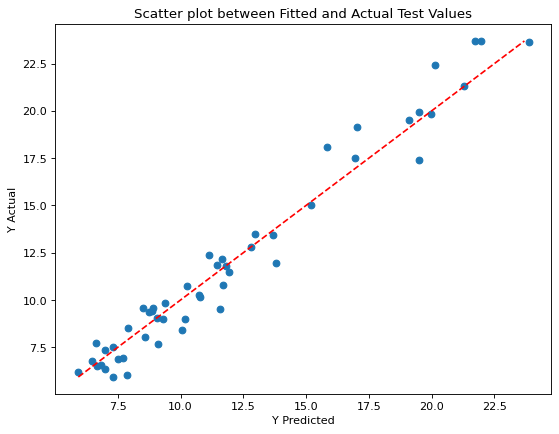

In [21]:
#Look at model plot
plt.figure(figsize=(8, 6), dpi=80)
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

#plot the scatter plot between the fitted values and actual test values for repsonse variable
plt.scatter(y_test_fitted, y_test)
plt.xlabel("Y Predicted")
plt.ylabel("Y Actual")
plt.title("Scatter plot between Fitted and Actual Test Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Fitted line')
plt.show()

# Model Evaluation

#### Checklist
* Multicollinearity
* Heteroscedasticity
* Outliers and influential points
* Deviation from Normality

#### Residual Analysis

In [22]:
x_train.columns

Index(['DistanceCovered(InKms)', 'BMI', 'Cost', 'PreviousClubCost', 'CHE',
       'MUN', 'LIV'],
      dtype='object')

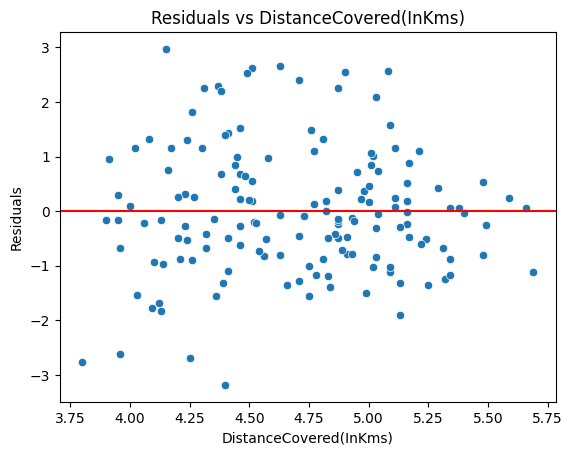

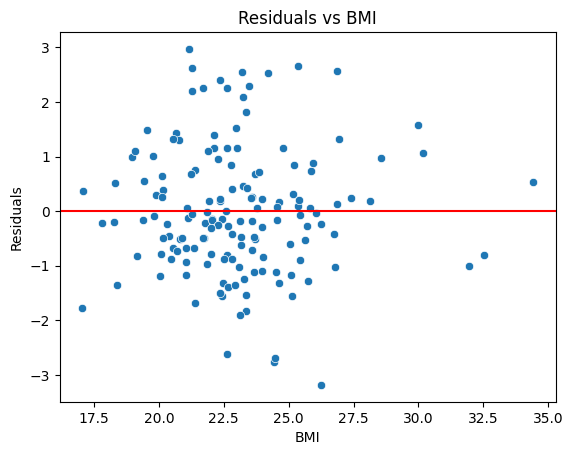

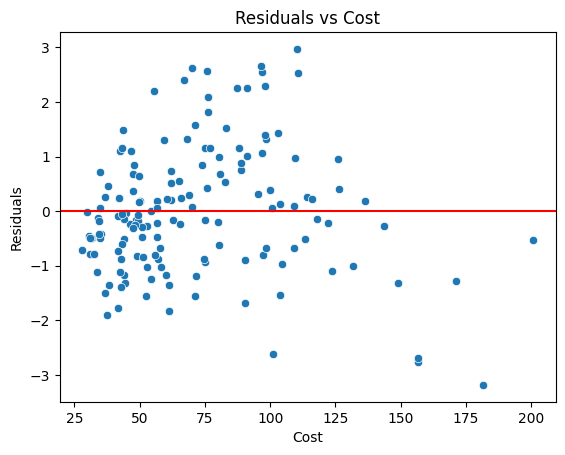

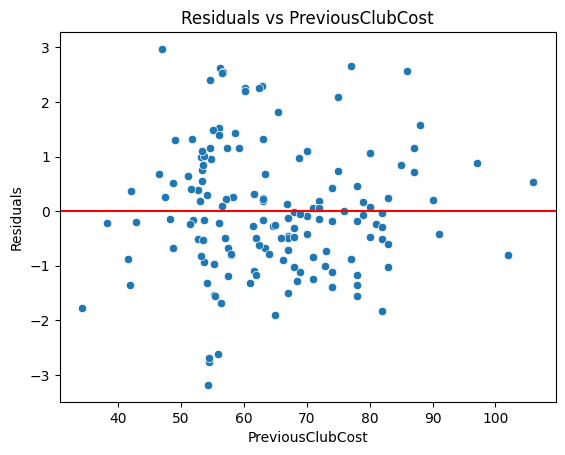

In [23]:
#Build predictions on training data
predictions_y = lr.predict(x_train_with_intercept)

#Find residuals
r_i = (y_train - predictions_y)


#Residuals vs. predictor in training data

# Create scatter plots of residuals against each predictor variable
for column in x_train.columns[0:4]:  # Skip the constant column
    sns.scatterplot(x=X[column], y=r_i)
    plt.xlabel(column)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs {column}')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()

__Here are the observations that we made from the above plots:__
 
* The residuals vs predictor variables show a good scatter of residuals and no pattern is observed up until 125 or 150 costs, or 27 BMI. We can say we have some heteroscedasticity in the higher costs. 

<Figure size 640x480 with 0 Axes>

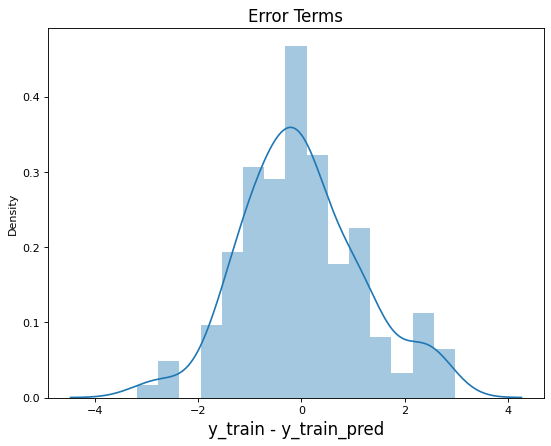

In [24]:
fig = plt.figure()
figure(figsize=(8, 6), dpi=80)

sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

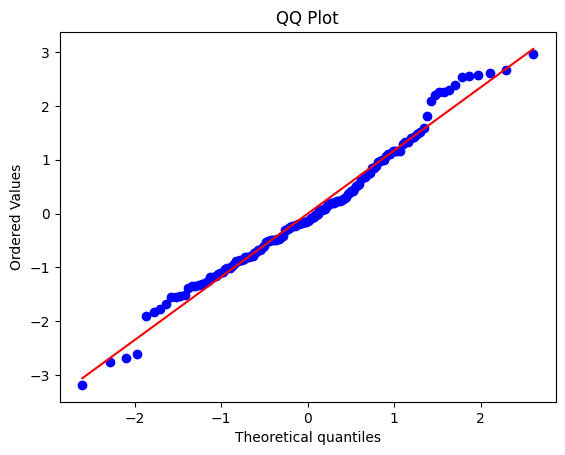

In [25]:
# Create QQ plot
stats.probplot(r_i, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

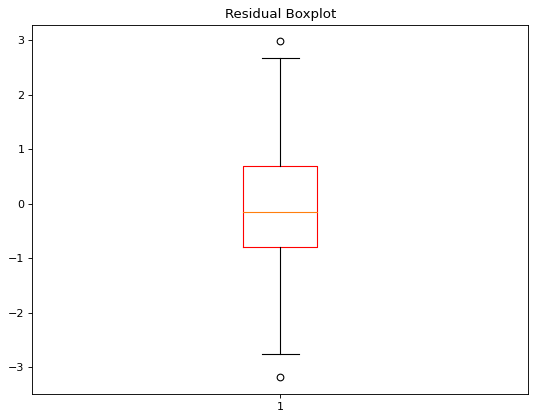

In [26]:
#Boxplot for outliers
# plot
figure(figsize=(8, 6), dpi=80)
plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot');

##shows no outliers

* The normality of the errors can be seen in the normal probability plot and the histogram. It is more or less normal or bell shaped.
 
* The residual boxplot shows no obvious outliers.